In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Fetch data for a specific stock, e.g., Nvidia (NVDA)
ticker = 'NVDA'
data = yf.download(ticker, start='2023-01-01', end='2024-06-30')

[*********************100%%**********************]  1 of 1 completed


In [17]:
print(data.head())

              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.306804  401277000
2023-01-04  14.567  14.853  14.241  14.749  14.740556  431324000
2023-01-05  14.491  14.564  14.148  14.265  14.256834  389168000
2023-01-06  14.474  15.010  14.034  14.859  14.850492  405044000
2023-01-09  15.284  16.056  15.141  15.628  15.619054  504231000


In [18]:
# Create a new column 'Prediction' which is the shifted 'Close' price
data['Prediction'] = data['Close'].shift(-30)  # Predicting 30 days into the future

In [19]:
# The feature dataset (X) will be the 'Close' prices
X = np.array(data['Close']).reshape(-1, 1)
# The target dataset (y) will be the shifted 'Close' prices
y = np.array(data['Prediction'])
# Remove the last 30 rows of the data (as they have NaN in 'Prediction')
X = X[:-30]
y = y[:-30]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Making predictions on the test set
predictions = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 106.05606967983572


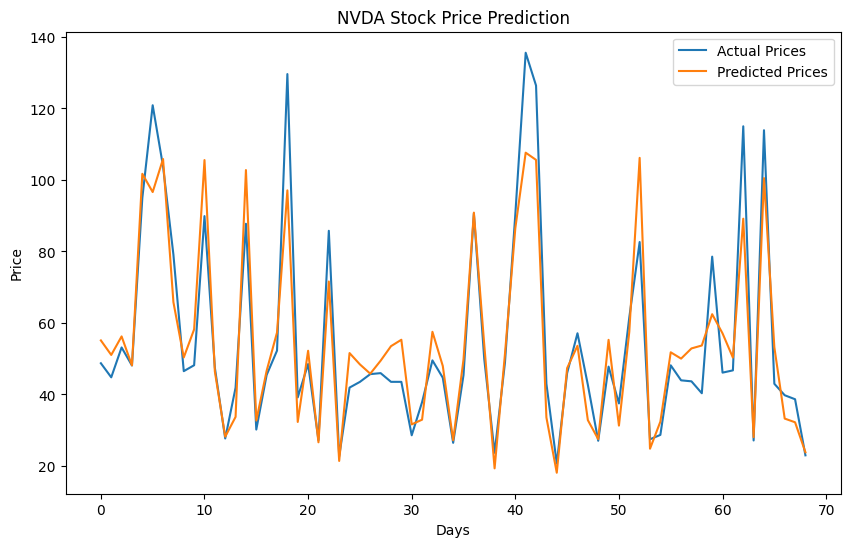

In [24]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

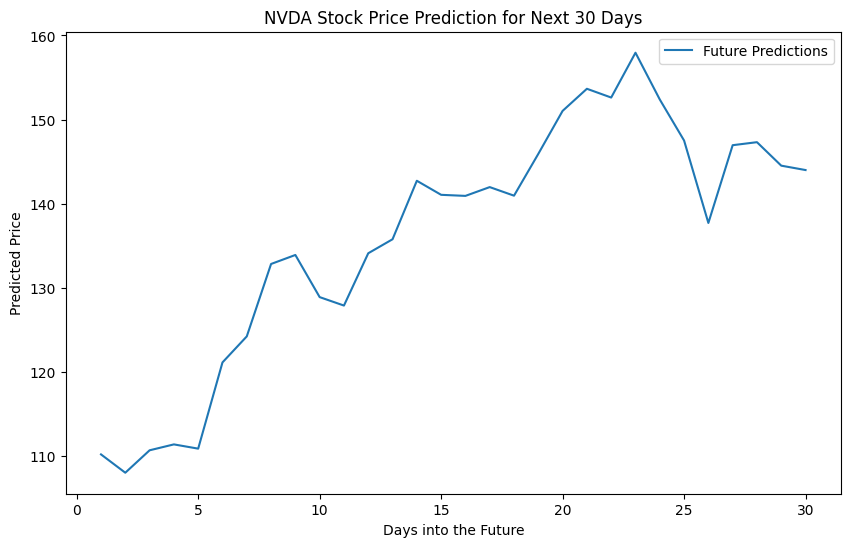

In [25]:
# Predicting the next 30 days of stock prices
future_X = np.array(data['Close'])[-30:].reshape(-1, 1)
future_predictions = model.predict(future_X)
# Plotting future predictions
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 31), future_predictions, label='Future Predictions')
plt.title(f'{ticker} Stock Price Prediction for Next 30 Days')
plt.xlabel('Days into the Future')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()